In this example we will create a normal distribution and take a smaller sample. From the sample, we show how to estimate the true mean and standard deviation of the larger population.

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import numpy.random as npr

import collections

In [3]:
mean = 100
stdev = 10

population = np.random.normal(loc=mean, scale=stdev, size=50000)
print(population)
print(len(population))
print(min(population))
print(max(population))
print(np.mean(population))


[109.34643543  99.79294052  96.77312044 ...  91.68040525 102.73348233
  96.87366649]
50000
61.12390577928308
137.56024537096135
100.04801800346989


In [4]:
! pip install bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [5]:

# take 1k 'samples' from the larger population
samples = population[:1000]

In [7]:
print(np.std([samples], axis=1))
print(np.mean([samples],axis =1))

[10.18746937]
[100.17234975]


In [8]:
# calculate bootstrap estimates for the mean and standard deviation
mean_results = bs.bootstrap(samples, stat_func=bs_stats.mean)

# see advanced_bootstrap_features.ipynb for a discussion of how to use the stat_func arg
stdev_results = bs.bootstrap(samples, stat_func=bs_stats.std)

In [9]:

print('Bootstrapped mean should be: {}'.format(mean))
print('\t' + str(mean_results))
print('')
print('Bootstrapped stdev should be: {}'.format(stdev))
print('\t' + str(stdev_results))

Bootstrapped mean should be: 100
	100.17234975369152    (99.5525605951183, 100.79621712384713)

Bootstrapped stdev should be: 10
	10.187469373032249    (9.74149713858495, 10.650088312788025)



Analysis

We found the mean and standard deviation we estimated are close to the true values. The bootstrap function also gives us error bars associated with the estimate.

Compare bootstrap to t-distribution

Below we will take several samples of different sizes from @population. For each sample we generate the 95% confidence intervals. We will see that the two methods produce functionally equivalent results.

In [10]:
import scipy.stats as st

In [11]:
sample_size = [100, 350, 500, 1000, 2500, 3500, 5000, 8000, 10000]

bootstrap_results = []

normal_results = []

for i in sample_size:
    samples = np.random.choice(population, i, replace=True)
    bsr = bs.bootstrap(samples, stat_func=bs_stats.mean, alpha=0.05)
    
    mr = st.t.interval(1-0.05, len(samples)-1, loc=np.mean(samples), scale=st.sem(samples))

    bootstrap_results.append((bsr.lower_bound, bsr.upper_bound))
    normal_results.append(mr)

Text(0.5, 1.0, 't-distribution vs Bootstrap')

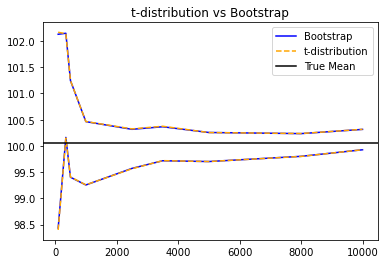

In [12]:

plt.plot(sample_size, [x[1] for x in bootstrap_results], c='blue')
plt.plot(sample_size, [x[1] for x in normal_results], linestyle='--', c='orange')

plt.plot(sample_size, [x[0] for x in bootstrap_results], c='blue', 
         label='Bootstrap')
plt.plot(sample_size, [x[0] for x in normal_results], linestyle='--', c='orange', 
         label='t-distribution')

plt.axhline(population.mean(), c='black', label='True Mean')
plt.legend(loc='best')
plt.title('t-distribution vs Bootstrap')